In [1]:
# 不归一化

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cbb27b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d361358>]], dtype=object)

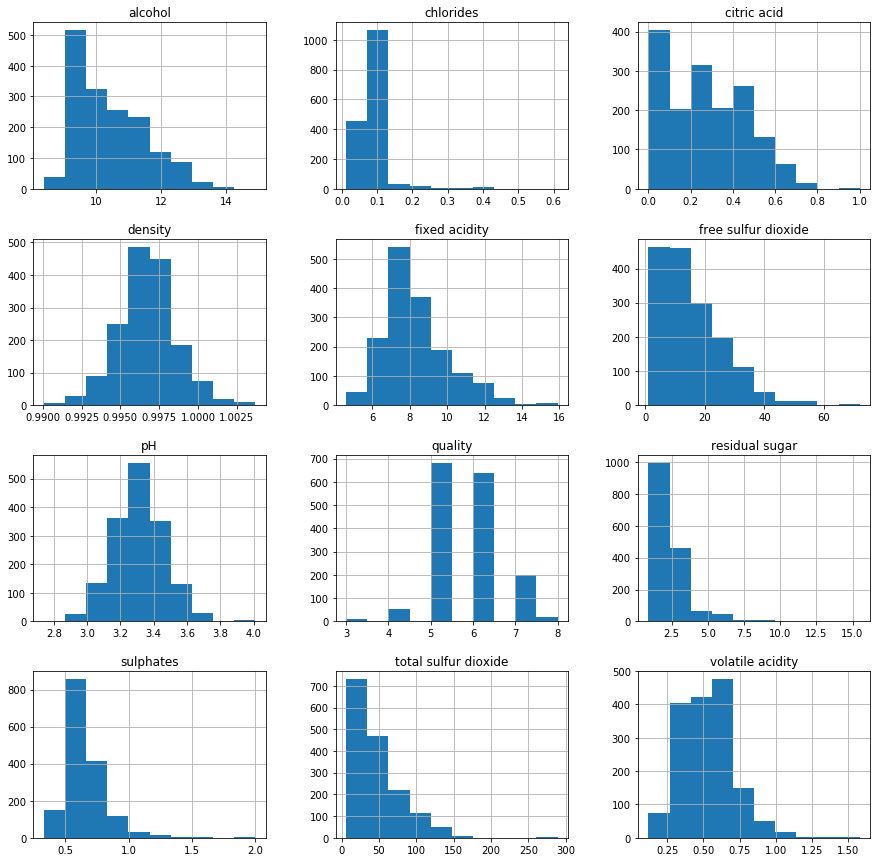

In [8]:
# read data and explore 

df = pd.read_csv('./winequality-red.csv', sep=';')
print(df.keys())
print(df.shape)

pd.DataFrame.hist(df, figsize=(15,15))

In [24]:
# 构造X，y
X = df.drop('quality', 1).values
y1 = df['quality'].values

print(df['quality'].unique())

# 原来就的质量有3~8共5个等级，现在我们将其二值化，小于5的为不好，否则为好
y = y1 <= 5
print(y, )
print(X.shape)
print(y.shape)

[5 6 7 4 8 3]
[ True  True  True ..., False  True False]
(1599, 11)
(1599,)


In [25]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kNN = neighbors.KNeighborsClassifier()
print(kNN)
model1 = kNN.fit(X_train, y_train)

print(model1.score(X_test, y_test))

y_true, y_pred = y_test, model1.predict(X_test)
print(classification_report(y_true, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
0.6125
             precision    recall  f1-score   support

      False       0.66      0.64      0.65       179
       True       0.56      0.57      0.57       141

avg / total       0.61      0.61      0.61       320



In [29]:
# 归一化

from sklearn.preprocessing import scale

Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
model2 = kNN.fit(Xs_train, y_train)

print(model2.score(Xs_test, y_test))

y_true, y_pred = y_test, model2.predict(Xs_test)
print(classification_report(y_true, y_pred))

0.7125
             precision    recall  f1-score   support

      False       0.72      0.79      0.75       179
       True       0.70      0.62      0.65       141

avg / total       0.71      0.71      0.71       320

